In [1]:
import tensorflow as tf  #tf >2.0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                    zoom_range=0.2,
                                  vertical_flip=True,
                                  horizontal_flip=True)

In [9]:
training_set = train_datagen.flow_from_directory(r'.\customDSMonkey\train',
                                                 target_size=(224,224),class_mode='categorical',batch_size=16
                                         )

Found 155 images belonging to 10 classes.


In [30]:
training_set.class_indices

{'bald_uakari': 0,
 'black_headed_night_monkey': 1,
 'common_squirrel_monkey': 2,
 'japanese_macaque': 3,
 'mantled_howler': 4,
 'nilgiri_langur': 5,
 'patas_monkey': 6,
 'pygmy_marmoset': 7,
 'silvery_marmoset': 8,
 'white_headed_capuchin': 9}

In [10]:
test_datagen= ImageDataGenerator(rescale=1./255)

test_set= test_datagen.flow_from_directory(r'.\customDSMonkey\validation',
                                          target_size=(224,224),class_mode='categorical',batch_size=16)

Found 128 images belonging to 10 classes.


In [11]:
#Initalising the CNN
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu',input_shape=[224,224,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               1

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [15]:
history=model.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
10/10 [==============================] - 23s 2s/step - loss: 2.3290 - accuracy: 0.0710 - val_loss: 2.2888 - val_accuracy: 0.1094
Epoch 2/15
10/10 [==============================] - 25s 3s/step - loss: 2.2476 - accuracy: 0.1548 - val_loss: 2.3119 - val_accuracy: 0.1250
Epoch 3/15
10/10 [==============================] - 22s 2s/step - loss: 2.1805 - accuracy: 0.2000 - val_loss: 2.1820 - val_accuracy: 0.2266
Epoch 4/15
10/10 [==============================] - 21s 2s/step - loss: 2.0736 - accuracy: 0.3032 - val_loss: 2.0296 - val_accuracy: 0.2500
Epoch 5/15
10/10 [==============================] - 21s 2s/step - loss: 1.9334 - accuracy: 0.3032 - val_loss: 1.8850 - val_accuracy: 0.3672
Epoch 6/15
10/10 [==============================] - 21s 2s/step - loss: 1.7408 - accuracy: 0.3806 - val_loss: 1.9881 - val_accuracy: 0.3281
Epoch 7/15
10/10 [==============================] - 21s 2s/step - loss: 1.6439 - accuracy: 0.4129 - val_loss: 2.1214 - val_accuracy: 0.4297
Epoch 8/15
10/10 [==

In [17]:
history.model.save(r'.\customDSMonkey\CustomDSmodel-10.h5')


In [24]:
model_load=tf.keras.models.load_model(r'.\customDSMonkey\CustomDSmodel-10.h5')
model_load.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               1

ValueError: x and y must have same first dimension, but have shapes (10,) and (15,)

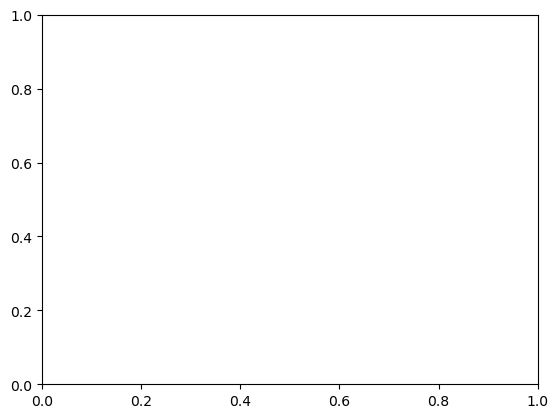

In [20]:
import matplotlib.pyplot as plt
acc_train=history.history['accuracy']
acc_val=history.history['val_accuracy']
epochs=range(1,11)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'r',label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [33]:
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing import image

def custom(test_image):
    
#     test_image=r'./cotton-disease/test/fresh cotton leaf/d (341).jpg'
    open_image=Image.open(test_image)
    test_image=image.load_img(test_image,target_size=(224,224))
    test_image=image.img_to_array(test_image)
    test_image=test_image/255
    # print(test_image.shape)

    test_image=np.expand_dims(test_image,axis=0)

    # print(test_image.shape)

    result=model.predict(test_image)
    print("Prob ",result)

    result=np.argmax(result)
    print(result)

    Name=list(training_set.class_indices)[int(result)]
    print(Name)
    

    plt.imshow(open_image)
#     plt.title(Name)
    plt.show()

1/1 [==============================] - 0s 437ms/step
Prob  [[0.07078303 0.02227098 0.72582954 0.00191553 0.06794714 0.01866383
  0.01900163 0.02543824 0.03174292 0.01640725]]
2
common_squirrel_monkey


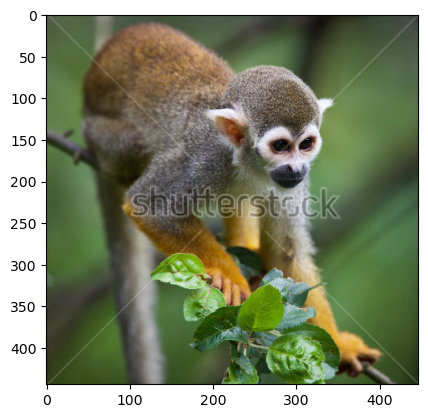

In [45]:
custom(r'.\customDSMonkey\validation\common_squirrel_monkey\n706.jpg')

1/1 [==============================] - 0s 64ms/step
Prob  [[3.5833255e-06 2.5071928e-05 7.0186521e-05 3.0914158e-08 9.9092394e-01
  8.2337074e-03 3.2894050e-06 4.4604880e-07 4.8560642e-06 7.3497172e-04]]
4
mantled_howler


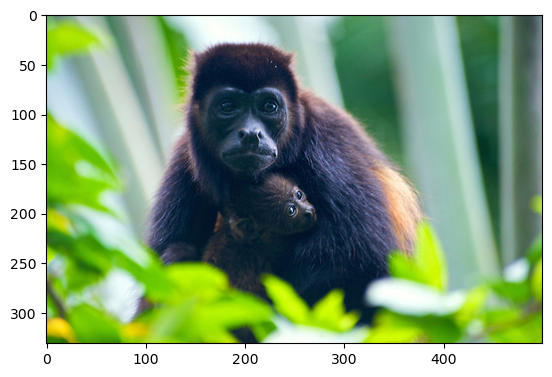

In [36]:
custom(r'.\customDSMonkey\validation\mantled_howler\1.jpg')

1/1 [==============================] - 0s 86ms/step
Prob  [[0.01422855 0.00214132 0.23237832 0.00603893 0.09864391 0.19765532
  0.10396287 0.05088393 0.10347771 0.19058923]]
2
common_squirrel_monkey


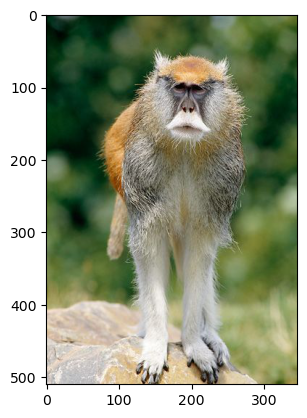

In [43]:
custom(r'.\customDSMonkey\validation\patas_monkey\14.jpg')

1/1 [==============================] - 0s 84ms/step
Prob  [[2.4871269e-02 2.3199043e-01 8.7890640e-02 2.3992949e-04 1.4028250e-01
  4.8802546e-01 3.8595388e-03 6.4725014e-03 1.0607971e-02 5.7597933e-03]]
5
nilgiri_langur


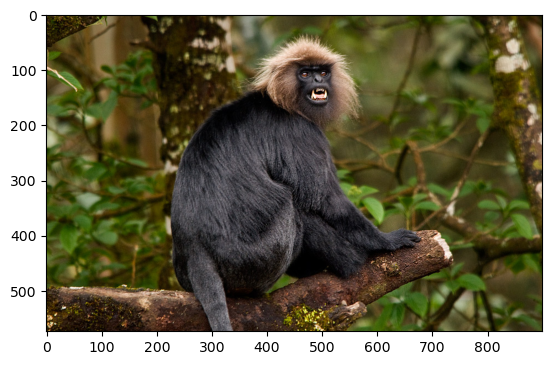

In [47]:
custom(r'.\customDSMonkey\validation\nilgiri_langur\n900.jpg')

1/1 [==============================] - 0s 344ms/step
Prob  [[2.6988424e-04 1.5996931e-02 1.4806613e-03 1.0886339e-04 3.0941647e-01
  5.6774497e-01 4.6225311e-03 1.5942796e-04 4.3286043e-04 9.9767424e-02]]
5
nilgiri_langur


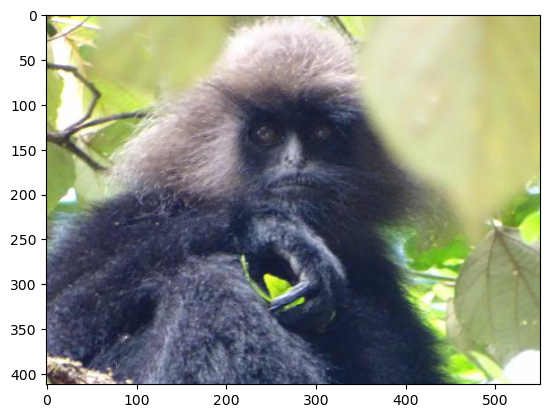

In [51]:
custom(r'.\customDSMonkey\validation\nilgiri_langur\n902.jpg')

1/1 [==============================] - 0s 93ms/step
Prob  [[0.60882163 0.03185697 0.00135613 0.24090134 0.01106572 0.00080087
  0.10120679 0.00068    0.00109027 0.00222037]]
0
bald_uakari


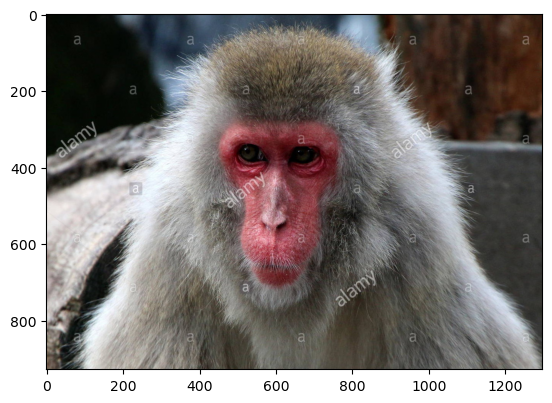

In [53]:
custom(r'.\customDSMonkey\validation\japanese_macaque\n317.jpg')

1/1 [==============================] - 0s 84ms/step
Prob  [[1.7452380e-02 3.3063479e-03 5.5412930e-03 4.3478822e-03 5.2626166e-03
  1.1385565e-03 9.5914352e-01 1.6066821e-03 4.6769710e-04 1.7329898e-03]]
6
patas_monkey


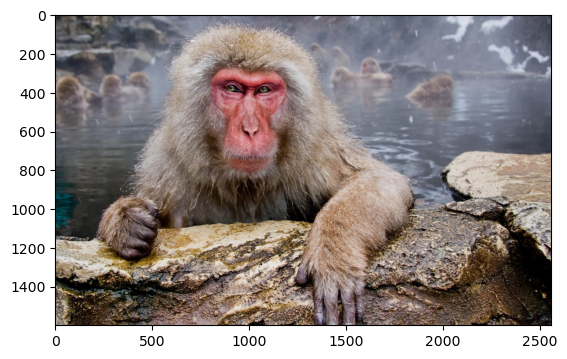

In [60]:
custom(r'.\customDSMonkey\validation\japanese_macaque\3.jpg')

1/1 [==============================] - 0s 75ms/step
Prob  [[0.1394857  0.00668908 0.0361147  0.3276508  0.06801571 0.00955892
  0.25254935 0.02489697 0.0142497  0.12078904]]
3
japanese_macaque


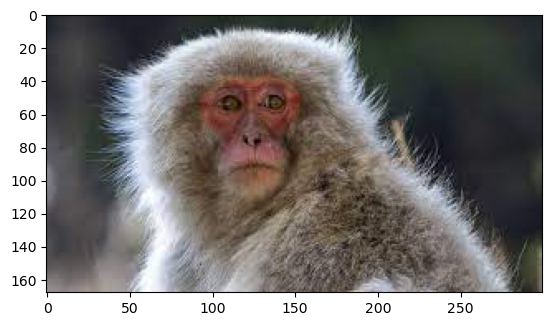

In [61]:
custom(r'.\customDSMonkey\validation\japanese_macaque\13.jpg')

1/1 [==============================] - 0s 218ms/step
Prob  [[1.8870385e-01 5.0871167e-03 7.6392531e-01 7.9973292e-04 2.7916908e-02
  7.6348166e-04 3.4373408e-04 1.1562043e-02 8.4036152e-04 5.7386180e-05]]
2
common_squirrel_monkey


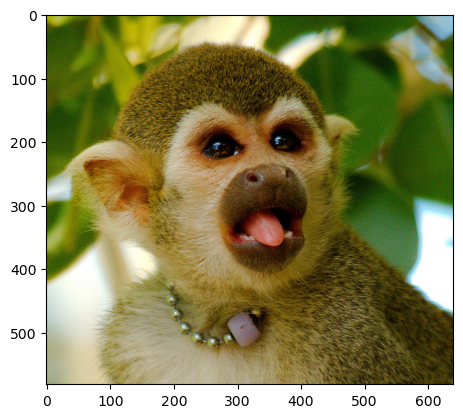

In [62]:
custom(r'.\customDSMonkey\validation\common_squirrel_monkey\n709.jpg')

1/1 [==============================] - 0s 93ms/step
Prob  [[0.02641539 0.60666263 0.14003734 0.01109372 0.00426922 0.00191166
  0.00316515 0.19442524 0.00997753 0.00204216]]
1
black_headed_night_monkey


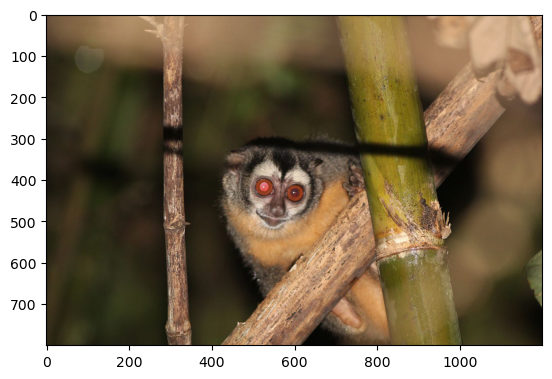

In [63]:
custom(r'.\customDSMonkey\validation\black_headed_night_monkey\n814.jpg')

1/1 [==============================] - 0s 350ms/step
Prob  [[9.9944896e-01 2.0869813e-04 2.9423884e-06 2.5230724e-05 3.1099014e-04
  3.9860524e-07 7.6826717e-07 1.1925308e-06 4.9148728e-08 7.3389992e-07]]
0
bald_uakari


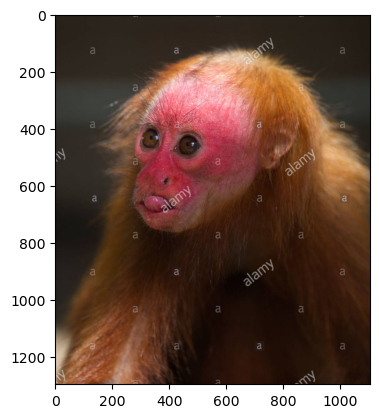

In [64]:
custom(r'.\customDSMonkey\validation\bald_uakari\n202.jpg')